In [1]:
import anndata
import scanpy as sc
import h5py

print("anndata version:", anndata.__version__)
print("scanpy version:", sc.__version__)
print("h5py version:", h5py.__version__)

anndata version: 0.12.2
scanpy version: 1.11.4
h5py version: 3.14.0


In [2]:
import scanpy as sc
import pandas as pd

# Load your processed single-cell dataset
# adata = sc.read_h5ad("../data/hb_tumor_data.h5ad")
adata = sc.read_h5ad('/Users/amurti/Desktop/UCSF_Projects/Hepatoblastoma_manuscript/sc_scratch_analysis/hb_tumor.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 9355 × 23086
    obs: 'nCount_RNA', 'nFeature_RNA', 'batch', 'sample', 'Sequencing_Run', 'Type', 'Patient', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'nCount_decontXcounts', 'nFeature_decontXcounts', 'Cluster Type', 'leiden_0.2', 'leiden_0.4', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'leiden_1.4', 'leiden_1.6', 'leiden_1.8', 'leiden', 'Cairo Hepatoblastoma Signature', 'Risk Score', 'Tumor Type', 'Tumor_Type', 'Patient_ID', 'Final_Tumor_Signature'
    var: 'name', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Final_Tumor_Signature_colors', 'Patient_ID_colors', 'Patient_colors', 'Tumor Type_colors', 'Tumor_Type_colors', 'dendrogram_Tumor_Type', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.2', 'leiden_0.2_colors', 'leiden_0.4', 'leiden_0.4_colors', 'leiden_0.6'

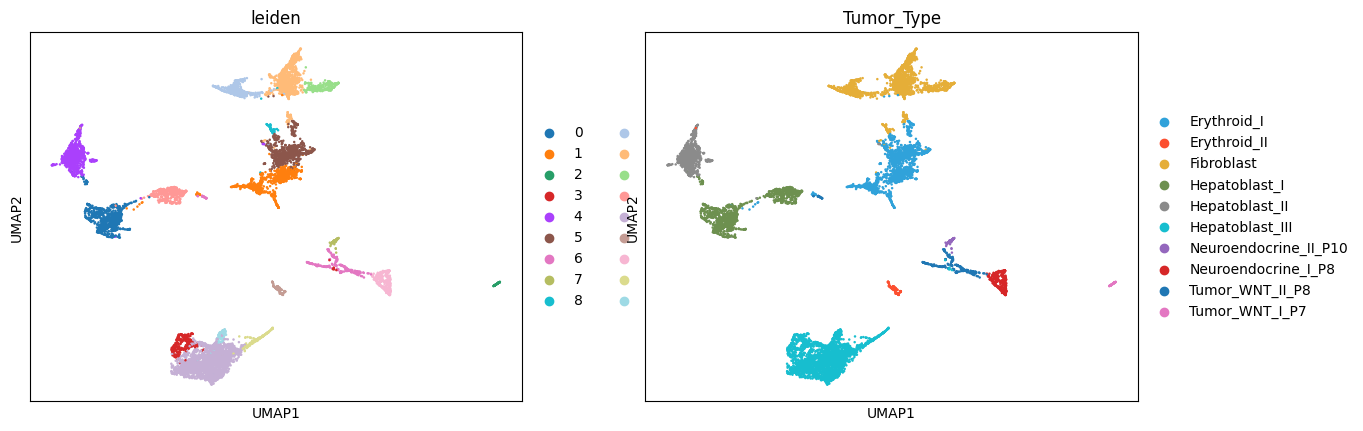

In [6]:
sc.pl.umap(adata, color = ['leiden','Tumor_Type'])

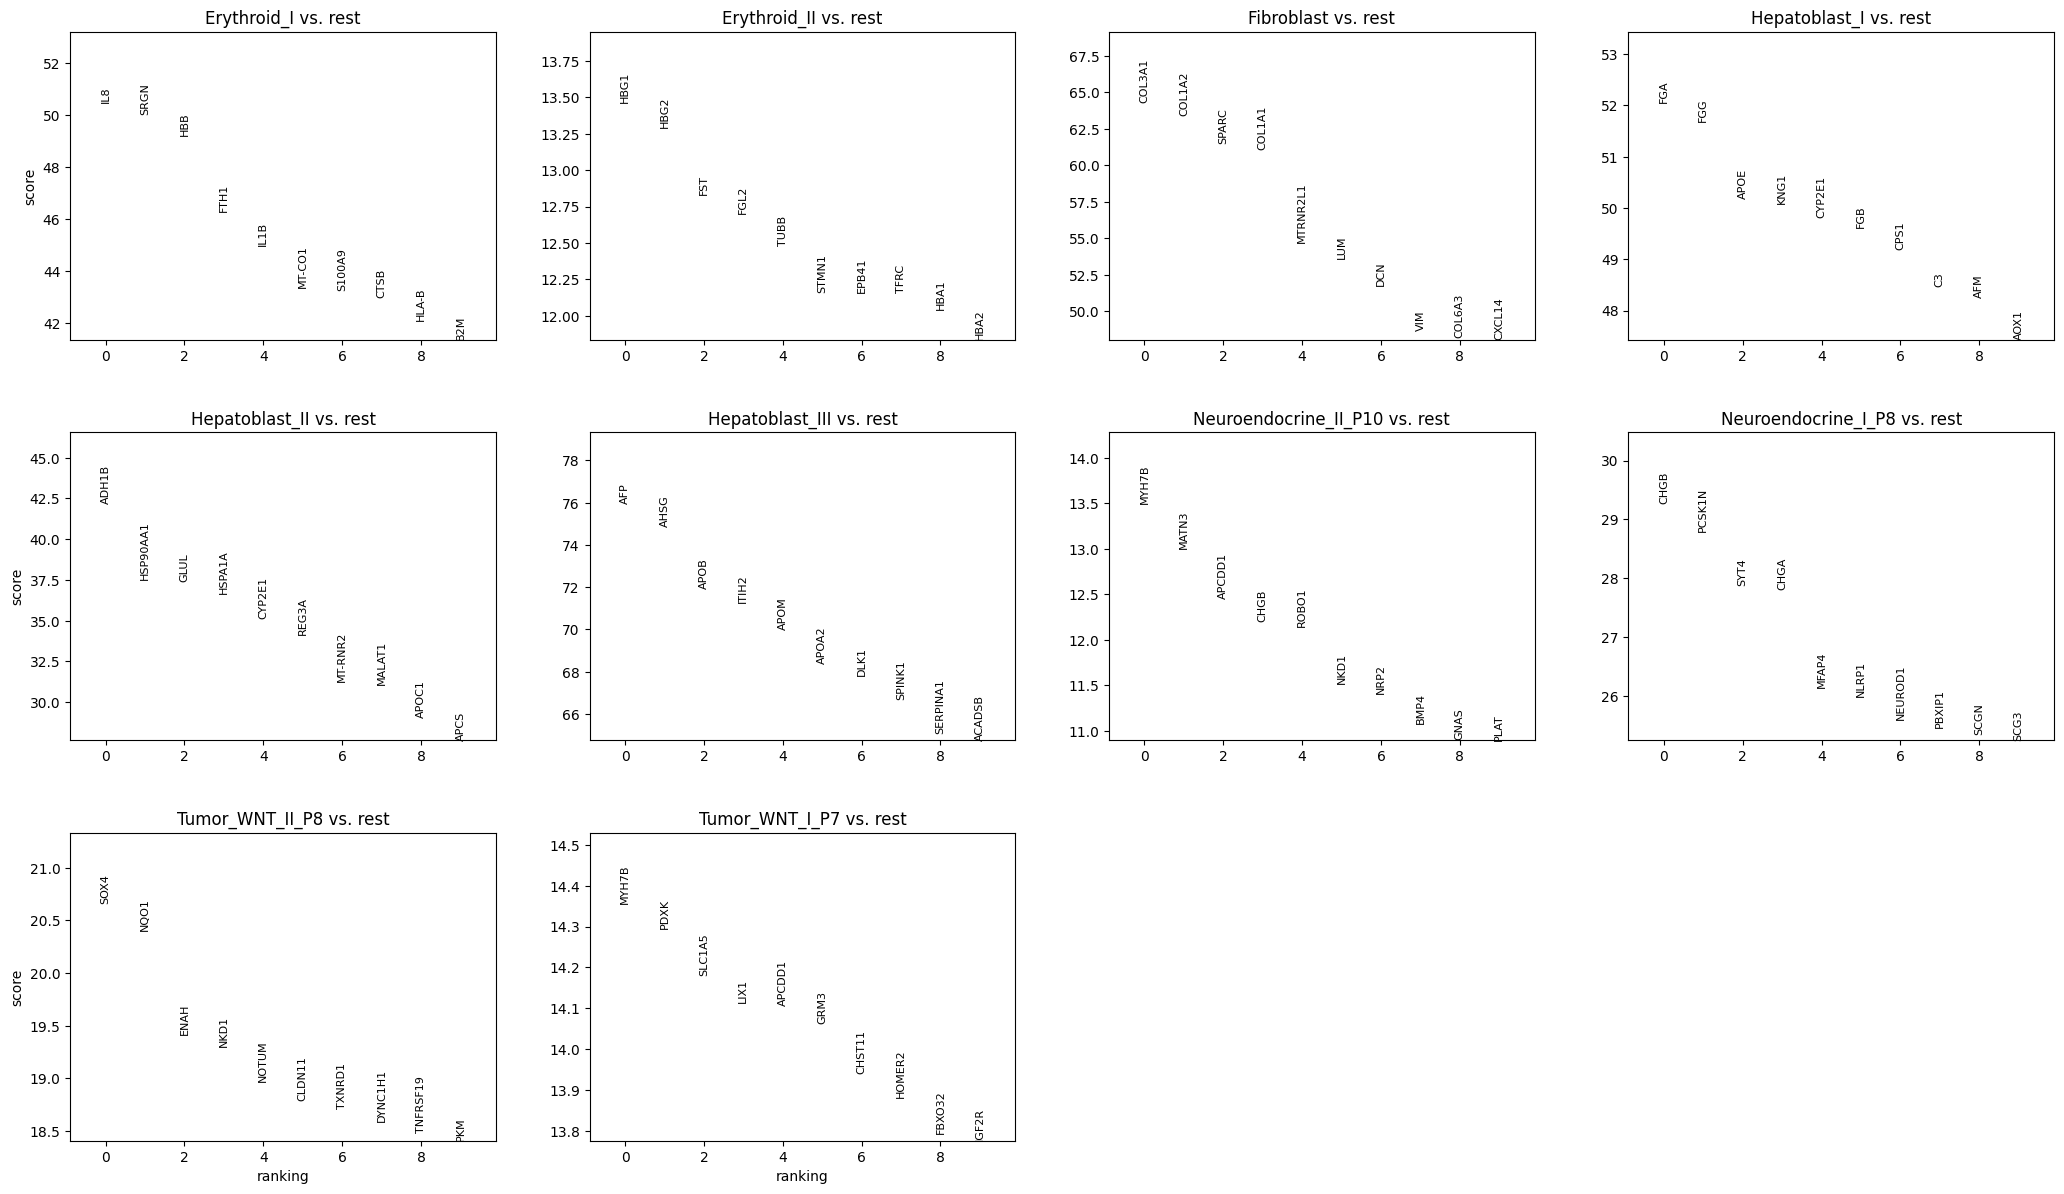

{'Erythroid_I': ['IL8',
  'SRGN',
  'HBB',
  'FTH1',
  'IL1B',
  'MT-CO1',
  'S100A9',
  'CTSB',
  'HLA-B',
  'B2M',
  'MTRNR2L1',
  'S100A8',
  'SPP1',
  'HLA-DRA',
  'TMSB10',
  'LYZ',
  'SOD2',
  'TIMP1',
  'TNFAIP3',
  'TMSB4X'],
 'Erythroid_II': ['HBG1',
  'HBG2',
  'FST',
  'FGL2',
  'TUBB',
  'STMN1',
  'EPB41',
  'TFRC',
  'HBA1',
  'HBA2',
  'MYH7B',
  'EIF2AK1',
  'SERPINI1',
  'FREM1',
  'SMC4',
  'APCDD1',
  'NKD1',
  'MKI67',
  'ABHD2',
  'WNK1'],
 'Fibroblast': ['COL3A1',
  'COL1A2',
  'SPARC',
  'COL1A1',
  'MTRNR2L1',
  'LUM',
  'DCN',
  'VIM',
  'COL6A3',
  'CXCL14',
  'POSTN',
  'MGP',
  'FSTL1',
  'MALAT1',
  'TMSB10',
  'COL5A2',
  'FOS',
  'COL6A2',
  'IGFBP7',
  'VCAN'],
 'Hepatoblast_I': ['FGA',
  'FGG',
  'APOE',
  'KNG1',
  'CYP2E1',
  'FGB',
  'CPS1',
  'C3',
  'AFM',
  'AOX1',
  'APOC3',
  'F5',
  'HMGCS2',
  'ACADVL',
  'ITIH1',
  'VTN',
  'AMBP',
  'HP',
  'GLUL',
  'AZGP1'],
 'Hepatoblast_II': ['ADH1B',
  'HSP90AA1',
  'GLUL',
  'HSPA1A',
  'CYP2E1',
  'RE

In [7]:
sc.tl.rank_genes_groups(adata, groupby='Tumor_Type', method='wilcoxon')

# Visualize the top genes (optional plot)
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

# Extract top 10 genes for each cluster
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = {g: result['names'][g][:20].tolist() for g in groups}
top_genes

In [8]:
# Save output for next phase
import json
with open("../outputs/top_genes_by_cluster.json", "w") as f:
    json.dump(top_genes, f, indent=2)